In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
import dask.dataframe as dd

In [3]:
df = dd.read_csv('bottle.csv', blocksize = 20e6)
df.columns

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')

In [4]:
df1= df[['Salnty', 'T_degC']]

In [5]:
df1.head()

,Salnty,T_degC
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


In [6]:
df1.columns = ['sal', 'temp']

In [7]:
df1.head()

,sal,temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


In [16]:
df2= df1.compute()

In [34]:
df2.tail()

,sal,temp
58381,33.4083,18.744
58382,33.4083,18.744
58383,33.4150,18.692
58384,33.4062,18.161
58385,33.3880,17.533


In [35]:
import seaborn as sns

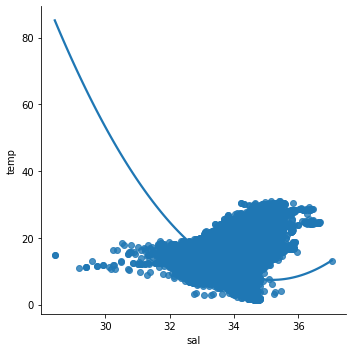

In [38]:
sns.lmplot(x= 'sal', y= 'temp', data= df2, order = 2, ci = None)

In [48]:
df2.fillna(method='ffill', inplace = True)

In [49]:
df2.isnull().sum()

sal     0
temp    0
dtype: int64

In [50]:
df2['sal']

0        33.4400
1        33.4400
2        33.4370
3        33.4200
4        33.4210
          ...   
58381    33.4083
58382    33.4083
58383    33.4150
58384    33.4062
58385    33.3880
Name: sal, Length: 864863, dtype: float64

In [74]:
x= np.array(df2['sal']).reshape(-1,1)
y= np.array(df2['temp']).reshape(-1,1)

In [75]:
x, y

(array([[33.44  ],
        [33.44  ],
        [33.437 ],
        ...,
        [33.415 ],
        [33.4062],
        [33.388 ]]),
 array([[10.5  ],
        [10.46 ],
        [10.46 ],
        ...,
        [18.692],
        [18.161],
        [17.533]]))

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25)

In [77]:
lr= LinearRegression()

In [78]:
lr.fit(x_train, y_train)

LinearRegression()

In [79]:
print(lr.score(x_test, y_test))

0.2004480566870338


In [80]:
y_pred= lr.predict(x_test)

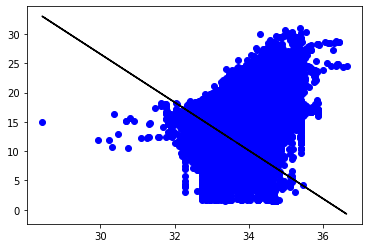

In [89]:
plt.scatter(x_test, y_test, color='b')
plt.plot(x_test, y_pred, color= 'k')

In [90]:
df2[:500]

,sal,temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45
...,...,...
495,34.269,4.90
496,34.310,4.50
497,34.311,4.48
498,34.319,4.21


In [97]:
df2['temp'].info()


<class 'pandas.core.series.Series'>
Int64Index: 864863 entries, 0 to 58385
Series name: temp
Non-Null Count   Dtype  
--------------   -----  
864863 non-null  float64
dtypes: float64(1)
memory usage: 13.2 MB


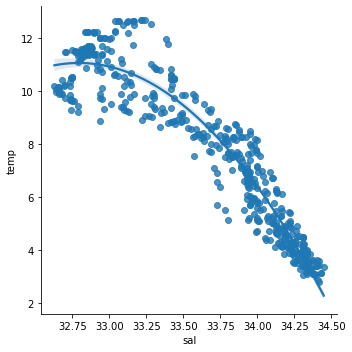

In [102]:
sns.lmplot(x='sal', y= 'temp', data=df2[:500], order=2)